# Single Soliton with SGD
## Contributor: Sumya H. Oishe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load your data
#data = pd.read_csv('/content/drive/MyDrive/Documents/5. Fall 2024/CMSC 678/CMSC 678 Project/LLE/Dynamical (FSOLVE)/data/solitondata.csv')
data = pd.read_csv('solitondata.csv')

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

X = data.iloc[:, :3].values  # Inputs: alpha, beta, F
y = data.iloc[:, 3:].values  # Targets: 512 soliton data points

In [3]:
data

,alpha,beta,F,1,2,3,4,5,6,7,...,503,504,505,506,507,508,509,510,511,512
0,3.70,-0.15,2.48,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632,...,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632,0.754632
1,6.50,-0.10,3.26,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391,...,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391,0.516391
2,3.00,-0.15,2.70,1.087971,1.087972,1.087972,1.087973,1.087975,1.087976,1.087979,...,1.087991,1.087987,1.087984,1.087981,1.087979,1.087976,1.087975,1.087973,1.087972,1.087972
3,5.00,-0.05,4.55,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361,...,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361,1.330361
4,3.20,-0.15,2.68,1.112273,1.112273,1.112272,1.112270,1.112267,1.112263,1.112258,...,1.112229,1.112238,1.112245,1.112252,1.112258,1.112263,1.112267,1.112270,1.112272,1.112273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,8.00,-0.05,3.73,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913,...,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913,0.475913
4550,3.70,-0.15,2.43,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395,...,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395,0.732395
4551,6.00,-0.05,2.43,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721,...,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721,0.410721
4552,7.00,-0.05,3.21,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340,...,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340,0.468340


In [3]:
# Define split sizes
train_size = int(0.8 * len(X))  # 80% for training
val_size = int(0.1 * len(X))    # 10% for validation
test_size = len(X) - train_size - val_size  # Remaining 10% for testing

In [4]:
# Split the data
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]


In [5]:
# Print sizes to confirm
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 3643
Validation set size: 455
Testing set size: 456


In [6]:
# Hyperparameters
learning_rate = 0.1
n_epochs = 500
n_features = X.shape[1]   # Number of input features (3 in this case)
n_targets = y.shape[1]    # Number of output targets (512 in this case)


# Let us introduce the SGD Regressor model
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [10]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [11]:
# Wrap the regressor with MultiOutputRegressor to handle multiple targets
multi_output_sgd = MultiOutputRegressor(sgd)

In [12]:
# Fit the model to the training data
multi_output_sgd.fit(X_train, y_train)

MultiOutputRegressor(estimator=SGDRegressor(random_state=42))

In [13]:
# Evaluate on validation and test data
y_val_pred = multi_output_sgd.predict(X_val)
y_test_pred = multi_output_sgd.predict(X_test)

In [14]:
# Calculate mean squared error
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [15]:
print(f"Validation MSE: {val_mse}")
print(f"Test MSE: {test_mse}")

Validation MSE: 0.016264283465057344
Test MSE: 0.015653327904932172


In [16]:
# Let us do some prediction
X_predict = np.array([4.0,-0.18,2.4]) # alpha,beta,F
# Reshape X_predict to have a batch dimension
X_predict = X_predict.reshape(1, -1)
y_predict = multi_output_sgd.predict(X_predict) # Remove the extra brackets around X_predict

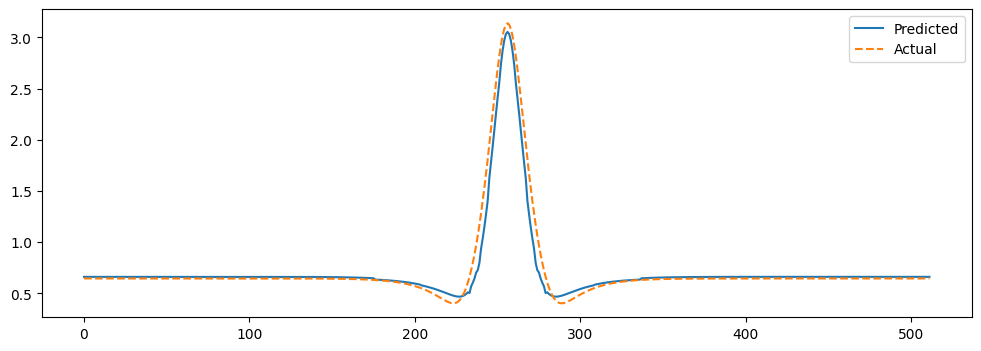

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,4))
xx = np.arange(0,512)
ax.plot(xx,y_predict[0],label='Predicted')
y_actual = [0.645013196,0.645013196,0.645013196,0.645013195,0.645013194,0.645013193,0.645013192,0.645013191,0.645013189,0.645013187,0.645013185,0.645013183,0.64501318,0.645013177,0.645013174,0.64501317,0.645013166,0.645013161,0.645013156,0.64501315,0.645013144,0.645013138,0.64501313,0.645013122,0.645013113,0.645013103,0.645013092,0.645013081,0.645013068,0.645013054,0.645013039,0.645013022,0.645013004,0.645012984,0.645012962,0.645012939,0.645012913,0.645012885,0.645012855,0.645012821,0.645012785,0.645012746,0.645012703,0.645012657,0.645012606,0.645012551,0.645012491,0.645012426,0.645012355,0.645012278,0.645012195,0.645012104,0.645012006,0.645011899,0.645011783,0.645011657,0.645011521,0.645011372,0.645011212,0.645011037,0.645010848,0.645010643,0.645010421,0.64501018,0.645009919,0.645009637,0.64500933,0.645008998,0.645008639,0.64500825,0.645007828,0.645007372,0.645006878,0.645006344,0.645005766,0.64500514,0.645004463,0.645003731,0.645002939,0.645002082,0.645001156,0.645000155,0.644999073,0.644997903,0.644996639,0.644995273,0.644993797,0.644992202,0.64499048,0.644988619,0.64498661,0.644984441,0.644982098,0.64497957,0.64497684,0.644973894,0.644970714,0.644967283,0.644963582,0.644959588,0.64495528,0.644950634,0.644945623,0.644940219,0.644934393,0.644928111,0.64492134,0.644914042,0.644906175,0.644897699,0.644888565,0.644878724,0.644868122,0.644856702,0.644844403,0.644831156,0.644816893,0.644801535,0.644785,0.644767201,0.644748043,0.644727424,0.644705235,0.644681359,0.64465567,0.644628035,0.644598308,0.644566334,0.644531948,0.644494972,0.644455214,0.64441247,0.644366521,0.644317131,0.644264048,0.644207003,0.644145707,0.644079849,0.644009097,0.643933098,0.643851469,0.643763804,0.643669667,0.64356859,0.643460074,0.643343585,0.64321855,0.643084358,0.642940353,0.642785836,0.642620056,0.642442215,0.642251455,0.64204686,0.641827454,0.64159219,0.64133995,0.641069541,0.640779688,0.640469028,0.640136107,0.639779371,0.639397161,0.638987707,0.638549119,0.638079379,0.637576336,0.637037694,0.636461003,0.635843653,0.635182857,0.634475648,0.633718859,0.63290912,0.632042838,0.631116185,0.630125086,0.629065203,0.627931918,0.626720318,0.625425179,0.624040946,0.622561714,0.620981215,0.61929279,0.617489376,0.615563485,0.613507183,0.611312072,0.608969272,0.606469405,0.603802578,0.600958376,0.597925853,0.59469353,0.591249405,0.587580966,0.583675225,0.57951876,0.575097792,0.570398278,0.565406045,0.560106978,0.554487256,0.548533679,0.542234084,0.535577899,0.528556858,0.521165926,0.513404508,0.505278001,0.496799805,0.487993906,0.478898201,0.469568733,0.460085072,0.450557049,0.441133064,0.432010035,0.423444871,0.415766808,0.409389226,0.404818396,0.402655385,0.403586535,0.408358675,0.417738589,0.432462187,0.453184939,0.480447135,0.514662987,0.556133402,0.605074123,0.661647889,0.725991399,0.798231989,0.878492636,0.966885831,1.063497481,1.168361778,1.281427547,1.40251634,1.531272568,1.667106502,1.809132025,1.95610268,2.10635181,2.257745226,2.407657533,2.552985142,2.690209178,2.815518635,2.924997429,3.014868299,3.081773213,3.123057236,3.137014721,3.123057236,3.081773213,3.014868299,2.924997429,2.815518635,2.690209178,2.552985142,2.407657533,2.257745226,2.10635181,1.95610268,1.809132025,1.667106502,1.531272568,1.40251634,1.281427547,1.168361778,1.063497481,0.966885831,0.878492636,0.798231989,0.725991399,0.661647889,0.605074123,0.556133402,0.514662987,0.480447135,0.453184939,0.432462187,0.417738589,0.408358675,0.403586535,0.402655385,0.404818396,0.409389226,0.415766808,0.423444871,0.432010035,0.441133064,0.450557049,0.460085072,0.469568733,0.478898201,0.487993906,0.496799805,0.505278001,0.513404508,0.521165926,0.528556858,0.535577899,0.542234084,0.548533679,0.554487256,0.560106978,0.565406045,0.570398278,0.575097792,0.57951876,0.583675225,0.587580966,0.591249405,0.59469353,0.597925853,0.600958376,0.603802578,0.606469405,0.608969272,0.611312072,0.613507183,0.615563485,0.617489376,0.61929279,0.620981215,0.622561714,0.624040946,0.625425179,0.626720318,0.627931918,0.629065203,0.630125086,0.631116185,0.632042838,0.63290912,0.633718859,0.634475648,0.635182857,0.635843653,0.636461003,0.637037694,0.637576336,0.638079379,0.638549119,0.638987707,0.639397161,0.639779371,0.640136107,0.640469028,0.640779688,0.641069541,0.64133995,0.64159219,0.641827454,0.64204686,0.642251455,0.642442215,0.642620056,0.642785836,0.642940353,0.643084358,0.64321855,0.643343585,0.643460074,0.64356859,0.643669667,0.643763804,0.643851469,0.643933098,0.644009097,0.644079849,0.644145707,0.644207003,0.644264048,0.644317131,0.644366521,0.64441247,0.644455214,0.644494972,0.644531948,0.644566334,0.644598308,0.644628035,0.64465567,0.644681359,0.644705235,0.644727424,0.644748043,0.644767201,0.644785,0.644801535,0.644816893,0.644831156,0.644844403,0.644856702,0.644868122,0.644878724,0.644888565,0.644897699,0.644906175,0.644914042,0.64492134,0.644928111,0.644934393,0.644940219,0.644945623,0.644950634,0.64495528,0.644959588,0.644963582,0.644967283,0.644970714,0.644973894,0.64497684,0.64497957,0.644982098,0.644984441,0.64498661,0.644988619,0.64499048,0.644992202,0.644993797,0.644995273,0.644996639,0.644997903,0.644999073,0.645000155,0.645001156,0.645002082,0.645002939,0.645003731,0.645004463,0.64500514,0.645005766,0.645006344,0.645006878,0.645007372,0.645007828,0.64500825,0.645008639,0.645008998,0.64500933,0.645009637,0.645009919,0.64501018,0.645010421,0.645010643,0.645010848,0.645011037,0.645011212,0.645011372,0.645011521,0.645011657,0.645011783,0.645011899,0.645012006,0.645012104,0.645012195,0.645012278,0.645012355,0.645012426,0.645012491,0.645012551,0.645012606,0.645012657,0.645012703,0.645012746,0.645012785,0.645012821,0.645012855,0.645012885,0.645012913,0.645012939,0.645012962,0.645012984,0.645013004,0.645013022,0.645013039,0.645013054,0.645013068,0.645013081,0.645013092,0.645013103,0.645013113,0.645013122,0.64501313,0.645013138,0.645013144,0.64501315,0.645013156,0.645013161,0.645013166,0.64501317,0.645013174,0.645013177,0.64501318,0.645013183,0.645013185,0.645013187,0.645013189,0.645013191,0.645013192,0.645013193,0.645013194,0.645013195,0.645013196,0.645013196
];
ax.plot(xx,y_actual,label='Actual',ls='--')
ax.legend()
plt.show()

**Let's introduce Random Forests (RF)**

1.   Random Forest is an ensemble learning method for regression (or classification) tasks. It combines multiple decision trees to make predictions that are more accurate and robust than a single decision tree.
2.   Random Forest introduces randomness in two ways:
  *   Bagging (Bootstrap Aggregation): Each tree is trained on a random subset of the training data.
  *   Feature Selection: Each tree considers a random subset of features at each split, which ensures diversity in the trees.
3. Reduces Overfitting: By averaging the results of multiple trees, it minimizes the risk of overfitting.
4. Handles Non-linear Relationships: Decision trees naturally capture non-linear patterns in the data.
5. Feature Importance: It provides insights into which features are most important for predictions.
6. For regression, Random Forest averages the predictions from all the trees. This averaging reduces the impact of noisy or overfitted individual trees, leading to better generalization.






In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=2))

start_time = time.time()
rf.fit(X_train, y_train)
fit_time = time.time()

y_pred_test = rf.predict(X_test)
predict_time = time.time()

test_mse = mean_squared_error(y_test, y_pred_test)

# Print results
print(f"Test MSE with Random Forest: {test_mse}")
print(f"Time taken to fit the model: {fit_time - start_time:.2f} seconds")
print(f"Time taken for prediction: {predict_time - fit_time:.2f} seconds")

Test MSE with Random Forest: 6.171382170793823e-06
Time taken to fit the model: 175.98 seconds
Time taken for prediction: 14.29 seconds


In [8]:
# Let us do some prediction
X_predict = np.array([4.0,-0.18,2.4]) # alpha,beta,F
# Reshape X_predict to have a batch dimension
X_predict = X_predict.reshape(1, -1)
y_predict = rf.predict(X_predict) # Remove the extra brackets around X_predict

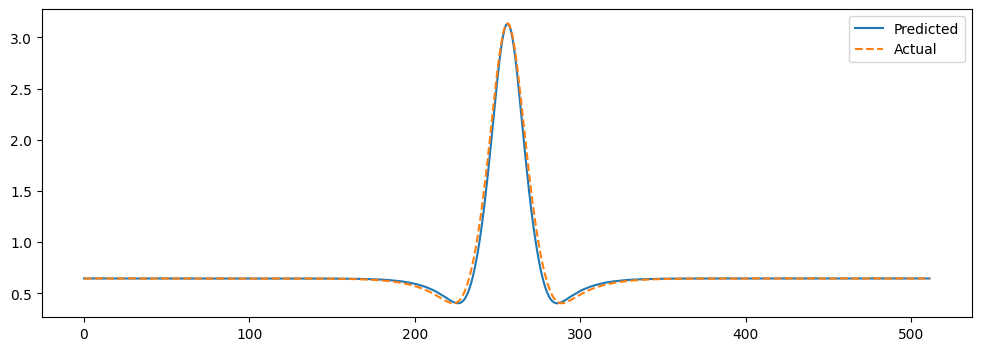

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,4))
xx = np.arange(0,512)
ax.plot(xx,y_predict[0],label='Predicted')
y_actual = [0.645013196,0.645013196,0.645013196,0.645013195,0.645013194,0.645013193,0.645013192,0.645013191,0.645013189,0.645013187,0.645013185,0.645013183,0.64501318,0.645013177,0.645013174,0.64501317,0.645013166,0.645013161,0.645013156,0.64501315,0.645013144,0.645013138,0.64501313,0.645013122,0.645013113,0.645013103,0.645013092,0.645013081,0.645013068,0.645013054,0.645013039,0.645013022,0.645013004,0.645012984,0.645012962,0.645012939,0.645012913,0.645012885,0.645012855,0.645012821,0.645012785,0.645012746,0.645012703,0.645012657,0.645012606,0.645012551,0.645012491,0.645012426,0.645012355,0.645012278,0.645012195,0.645012104,0.645012006,0.645011899,0.645011783,0.645011657,0.645011521,0.645011372,0.645011212,0.645011037,0.645010848,0.645010643,0.645010421,0.64501018,0.645009919,0.645009637,0.64500933,0.645008998,0.645008639,0.64500825,0.645007828,0.645007372,0.645006878,0.645006344,0.645005766,0.64500514,0.645004463,0.645003731,0.645002939,0.645002082,0.645001156,0.645000155,0.644999073,0.644997903,0.644996639,0.644995273,0.644993797,0.644992202,0.64499048,0.644988619,0.64498661,0.644984441,0.644982098,0.64497957,0.64497684,0.644973894,0.644970714,0.644967283,0.644963582,0.644959588,0.64495528,0.644950634,0.644945623,0.644940219,0.644934393,0.644928111,0.64492134,0.644914042,0.644906175,0.644897699,0.644888565,0.644878724,0.644868122,0.644856702,0.644844403,0.644831156,0.644816893,0.644801535,0.644785,0.644767201,0.644748043,0.644727424,0.644705235,0.644681359,0.64465567,0.644628035,0.644598308,0.644566334,0.644531948,0.644494972,0.644455214,0.64441247,0.644366521,0.644317131,0.644264048,0.644207003,0.644145707,0.644079849,0.644009097,0.643933098,0.643851469,0.643763804,0.643669667,0.64356859,0.643460074,0.643343585,0.64321855,0.643084358,0.642940353,0.642785836,0.642620056,0.642442215,0.642251455,0.64204686,0.641827454,0.64159219,0.64133995,0.641069541,0.640779688,0.640469028,0.640136107,0.639779371,0.639397161,0.638987707,0.638549119,0.638079379,0.637576336,0.637037694,0.636461003,0.635843653,0.635182857,0.634475648,0.633718859,0.63290912,0.632042838,0.631116185,0.630125086,0.629065203,0.627931918,0.626720318,0.625425179,0.624040946,0.622561714,0.620981215,0.61929279,0.617489376,0.615563485,0.613507183,0.611312072,0.608969272,0.606469405,0.603802578,0.600958376,0.597925853,0.59469353,0.591249405,0.587580966,0.583675225,0.57951876,0.575097792,0.570398278,0.565406045,0.560106978,0.554487256,0.548533679,0.542234084,0.535577899,0.528556858,0.521165926,0.513404508,0.505278001,0.496799805,0.487993906,0.478898201,0.469568733,0.460085072,0.450557049,0.441133064,0.432010035,0.423444871,0.415766808,0.409389226,0.404818396,0.402655385,0.403586535,0.408358675,0.417738589,0.432462187,0.453184939,0.480447135,0.514662987,0.556133402,0.605074123,0.661647889,0.725991399,0.798231989,0.878492636,0.966885831,1.063497481,1.168361778,1.281427547,1.40251634,1.531272568,1.667106502,1.809132025,1.95610268,2.10635181,2.257745226,2.407657533,2.552985142,2.690209178,2.815518635,2.924997429,3.014868299,3.081773213,3.123057236,3.137014721,3.123057236,3.081773213,3.014868299,2.924997429,2.815518635,2.690209178,2.552985142,2.407657533,2.257745226,2.10635181,1.95610268,1.809132025,1.667106502,1.531272568,1.40251634,1.281427547,1.168361778,1.063497481,0.966885831,0.878492636,0.798231989,0.725991399,0.661647889,0.605074123,0.556133402,0.514662987,0.480447135,0.453184939,0.432462187,0.417738589,0.408358675,0.403586535,0.402655385,0.404818396,0.409389226,0.415766808,0.423444871,0.432010035,0.441133064,0.450557049,0.460085072,0.469568733,0.478898201,0.487993906,0.496799805,0.505278001,0.513404508,0.521165926,0.528556858,0.535577899,0.542234084,0.548533679,0.554487256,0.560106978,0.565406045,0.570398278,0.575097792,0.57951876,0.583675225,0.587580966,0.591249405,0.59469353,0.597925853,0.600958376,0.603802578,0.606469405,0.608969272,0.611312072,0.613507183,0.615563485,0.617489376,0.61929279,0.620981215,0.622561714,0.624040946,0.625425179,0.626720318,0.627931918,0.629065203,0.630125086,0.631116185,0.632042838,0.63290912,0.633718859,0.634475648,0.635182857,0.635843653,0.636461003,0.637037694,0.637576336,0.638079379,0.638549119,0.638987707,0.639397161,0.639779371,0.640136107,0.640469028,0.640779688,0.641069541,0.64133995,0.64159219,0.641827454,0.64204686,0.642251455,0.642442215,0.642620056,0.642785836,0.642940353,0.643084358,0.64321855,0.643343585,0.643460074,0.64356859,0.643669667,0.643763804,0.643851469,0.643933098,0.644009097,0.644079849,0.644145707,0.644207003,0.644264048,0.644317131,0.644366521,0.64441247,0.644455214,0.644494972,0.644531948,0.644566334,0.644598308,0.644628035,0.64465567,0.644681359,0.644705235,0.644727424,0.644748043,0.644767201,0.644785,0.644801535,0.644816893,0.644831156,0.644844403,0.644856702,0.644868122,0.644878724,0.644888565,0.644897699,0.644906175,0.644914042,0.64492134,0.644928111,0.644934393,0.644940219,0.644945623,0.644950634,0.64495528,0.644959588,0.644963582,0.644967283,0.644970714,0.644973894,0.64497684,0.64497957,0.644982098,0.644984441,0.64498661,0.644988619,0.64499048,0.644992202,0.644993797,0.644995273,0.644996639,0.644997903,0.644999073,0.645000155,0.645001156,0.645002082,0.645002939,0.645003731,0.645004463,0.64500514,0.645005766,0.645006344,0.645006878,0.645007372,0.645007828,0.64500825,0.645008639,0.645008998,0.64500933,0.645009637,0.645009919,0.64501018,0.645010421,0.645010643,0.645010848,0.645011037,0.645011212,0.645011372,0.645011521,0.645011657,0.645011783,0.645011899,0.645012006,0.645012104,0.645012195,0.645012278,0.645012355,0.645012426,0.645012491,0.645012551,0.645012606,0.645012657,0.645012703,0.645012746,0.645012785,0.645012821,0.645012855,0.645012885,0.645012913,0.645012939,0.645012962,0.645012984,0.645013004,0.645013022,0.645013039,0.645013054,0.645013068,0.645013081,0.645013092,0.645013103,0.645013113,0.645013122,0.64501313,0.645013138,0.645013144,0.64501315,0.645013156,0.645013161,0.645013166,0.64501317,0.645013174,0.645013177,0.64501318,0.645013183,0.645013185,0.645013187,0.645013189,0.645013191,0.645013192,0.645013193,0.645013194,0.645013195,0.645013196,0.645013196];
ax.plot(xx,y_actual,label='Actual',ls='--')
ax.legend()
plt.show()

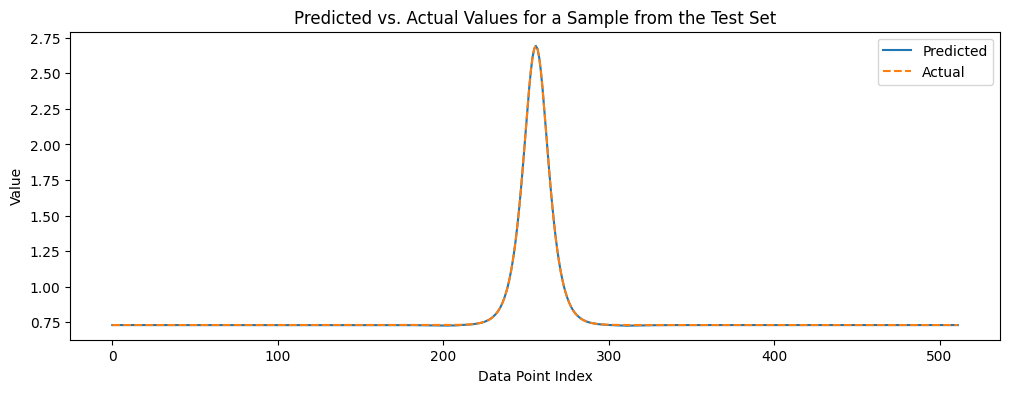

In [10]:
# Here we select the first sample from the test set for comparison

sample_index = 300
y_actual = y_test[sample_index]      # Actual values for the selected sample
y_predicted = y_pred_test[sample_index]  # Predicted values for the selected sample

# Create a plot
fig, ax = plt.subplots(figsize=(12, 4))
xx = np.arange(0, 512)  # X-axis range for the 512 points in each sample

# Plot predicted and actual values
ax.plot(xx, y_predicted, label='Predicted')
ax.plot(xx, y_actual, label='Actual', ls='--')  # Dashed line for actual values
ax.legend()

# Add labels and title
ax.set_xlabel("Data Point Index")
ax.set_ylabel("Value")
ax.set_title("Predicted vs. Actual Values for a Sample from the Test Set")

# Display the plot
plt.show()
